In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy
import os
from d2l import torch as d2l  # Use PyTorch as the backend

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 分割测试集和训练集

In [2]:
# !python train_test_split.py #分割测试集和训练集

# 查看数据集

In [3]:
# 注意读入时将PIL就转为tensor 并且resizec成一致大小
train_data = torchvision.datasets.ImageFolder('data_split/train/', transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                                                                                               torchvision.transforms.Resize([256,256])]))
test_data = torchvision.datasets.ImageFolder('data_split/test/', transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                                                                                             torchvision.transforms.Resize([256,256])]))   

In [4]:
len(train_data.classes)
len(test_data.classes)

545

In [5]:
len(train_data)
len(test_data)

5970

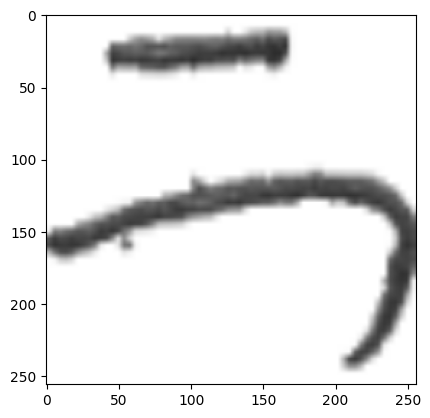

In [6]:
img_trans = torchvision.transforms.ToPILImage()
plt.imshow(img_trans(train_data[0][0]))

In [7]:
train_data[0][0].shape
test_data[0][0].shape

torch.Size([3, 256, 256])

In [8]:
train_data[0][0]

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

# 图像增广

## 因为使用的不是官方数据集，我们需要手动计算均值和标准差

In [9]:
# 因为图像的大小并不完全一样，妨碍我们计算均值和标准差再进行normalize，所以我们回到开头将图像转化为同一尺寸

In [10]:
loader = torch.utils.data.DataLoader(train_data, batch_size=len(train_data))
data = next(iter(loader))[0]
mean_train = data.mean(dim=(0, 2, 3))
std_train = data.std(dim=(0, 2, 3))

In [11]:
loader = torch.utils.data.DataLoader(test_data, batch_size=len(train_data))
data = next(iter(loader))[0]
mean_test = data.mean(dim=(0, 2, 3))
std_test = data.std(dim=(0, 2, 3))

In [12]:
mean_train, std_train, mean_test, std_test

(tensor([0.8715, 0.8715, 0.8715]),
 tensor([0.2378, 0.2378, 0.2378]),
 tensor([0.8717, 0.8717, 0.8717]),
 tensor([0.2377, 0.2377, 0.2377]))

## 图像增广正式开始

In [13]:
normalize_train = torchvision.transforms.Normalize(mean_train, std_train)
normalize_test = torchvision.transforms.Normalize(mean_test, std_test)

train_augs = torchvision.transforms.Compose([torchvision.transforms.RandomResizedCrop(224),
                                            torchvision.transforms.RandomHorizontalFlip(),
                                            normalize_train])

test_augs = torchvision.transforms.Compose([torchvision.transforms.CenterCrop(224),
                                           normalize_test])

In [14]:
train_data = torchvision.datasets.ImageFolder('data_split/train/', transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                                                                                               torchvision.transforms.Resize([256,256]),
                                                                                                              train_augs]))
test_data = torchvision.datasets.ImageFolder('data_split/test/', transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                                                                                               torchvision.transforms.Resize([256,256]),
                                                                                                            test_augs]))

In [15]:
train_data[0][0]

tensor([[[0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403],
         [0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403],
         [0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403],
         ...,
         [0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403],
         [0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403],
         [0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403]],

        [[0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403],
         [0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403],
         [0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403],
         ...,
         [0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403],
         [0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403],
         [0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403]],

        [[0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403],
         [0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.5403],
         [0.5403, 0.5403, 0.5403,  ..., 0.5403, 0.5403, 0.

# 训练

## 定义和初始化模型

In [16]:
finetune_net = torchvision.models.resnet18(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
finetune_net.fc = torch.nn.Linear(finetune_net.fc.in_features, 545)
torch.nn.init.xavier_uniform_(finetune_net.fc.weight)

Parameter containing:
tensor([[-0.0372,  0.0432,  0.0371,  ...,  0.0640, -0.0436,  0.0608],
        [-0.0480,  0.0236,  0.0238,  ..., -0.0559, -0.0468, -0.0623],
        [ 0.0686,  0.0036,  0.0205,  ...,  0.0095,  0.0583,  0.0634],
        ...,
        [-0.0652, -0.0471, -0.0667,  ...,  0.0647, -0.0274,  0.0707],
        [-0.0230, -0.0392,  0.0228,  ..., -0.0401,  0.0603,  0.0428],
        [-0.0053,  0.0713,  0.0137,  ...,  0.0669,  0.0176,  0.0687]],
       requires_grad=True)

## 微调训练模型

In [24]:
# 如果param_group=True，输出层中的模型参数将使用十倍的学习率
def train_fine_tuning(net, learning_rate, batch_size=128, num_epochs=5,
                      param_group=True):
    train_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(
        os.path.join('data_split', 'train'), transform= torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Resize([256,256]),train_augs])),
        batch_size=batch_size, shuffle=True)
    test_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(
        os.path.join('data_split', 'test'), transform= torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Resize([256,256]),test_augs])),
        batch_size=batch_size)
    devices = d2l.try_all_gpus()
    loss = torch.nn.CrossEntropyLoss(reduction="none")
    if param_group:
        params_1x = [param for name, param in net.named_parameters()
             if name not in ["fc.weight", "fc.bias"]]
        trainer = torch.optim.SGD([{'params': params_1x},
                                   {'params': net.fc.parameters(),
                                    'lr': learning_rate * 10}],
                                lr=learning_rate, weight_decay=0.001)
    else:
        trainer = torch.optim.SGD(net.parameters(), lr=learning_rate,
                                  weight_decay=0.001)
    d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,
                   devices)


loss 2.458, train acc 0.528, test acc 0.790
1259.2 examples/sec on [device(type='cuda', index=0), device(type='cuda', index=1)]


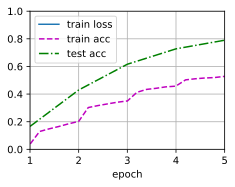

In [25]:
train_fine_tuning(finetune_net, 5e-5)

loss 1.328, train acc 0.708, test acc 0.923
1290.9 examples/sec on [device(type='cuda', index=0), device(type='cuda', index=1)]


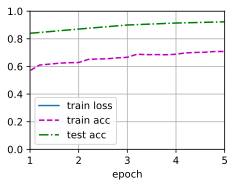

In [26]:
train_fine_tuning(finetune_net, 10e-5)

loss 1.007, train acc 0.761, test acc 0.947
1297.2 examples/sec on [device(type='cuda', index=0), device(type='cuda', index=1)]


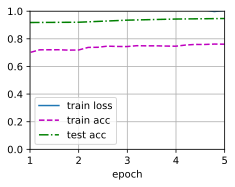

In [27]:
train_fine_tuning(finetune_net, 20e-5)

loss 0.899, train acc 0.778, test acc 0.948
1289.5 examples/sec on [device(type='cuda', index=0), device(type='cuda', index=1)]


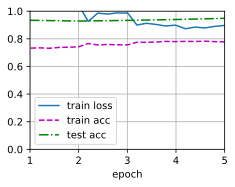

In [30]:
train_fine_tuning(finetune_net, 50e-5)

loss 1.033, train acc 0.760, test acc 0.938
1288.0 examples/sec on [device(type='cuda', index=0), device(type='cuda', index=1)]


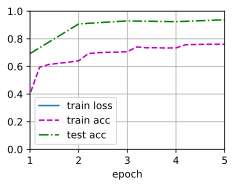

In [31]:
train_fine_tuning(finetune_net, 100e-5)

**学习率太大 网络收敛失败，回调学习率并且增加epoch**

loss 0.653, train acc 0.835, test acc 0.976
1287.9 examples/sec on [device(type='cuda', index=0), device(type='cuda', index=1)]


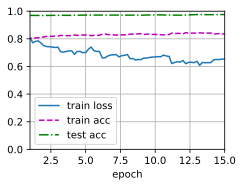

In [34]:
train_fine_tuning(finetune_net, 20e-5, num_epochs = 15)

**最终停止训练，测试集准确率达到了97%,但是存在的小问题是训练集准确率稳定低于测试集准确率**